In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.ensemble import BaggingClassifier
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import tensorflow as tf
from sklearn.datasets import load_iris # dataset
from sklearn.svm import SVC # model 생성
from sklearn.model_selection import train_test_split # train/test set
from sklearn.metrics import accuracy_score, confusion_matrix # model 평가

Using TensorFlow backend.


In [10]:
df = pd.read_csv('C:/Users/CPBUser/Desktop/막걸리/라벨링16.csv', encoding = 'CP949')

In [12]:
x = df[['드라이', '신맛', '고소한맛', '단맛', '과일']]
y = df[['label_클라라7개']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# 분류모델

In [53]:
model = Sequential()
model.add(Dense(8, input_dim = 5, activation = 'softmax'))
model.add(Dense(8, activation = 'softmax'))
model.add(Dense(8, activation = 'softmax'))
model.add(Dense(7, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 2000, verbose = 0)


In [54]:
print("\n 정확도 : %.2f" % (model.evaluate(x_test, y_test)[1]))


510/510 [==============================] - 0s 37us/step

 정확도 : 0.54


# KNN을 활용한 분류 분석

C:\BigData\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\BigData\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\BigData\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\BigData\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\BigData\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A col

C:\BigData\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\BigData\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\BigData\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\BigData\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\BigData\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector 

C:\BigData\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\BigData\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\BigData\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\BigData\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\BigData\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector 

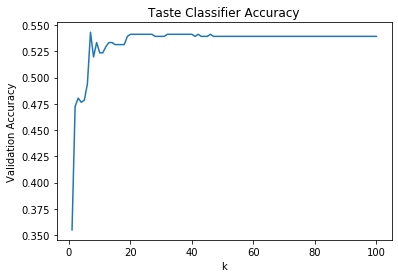

In [5]:
# KNN 분류 분석

classifier = KNeighborsClassifier(n_neighbors = 7)

classifier.fit(x_train, y_train)

classifier.fit(x_test, y_test)

k_list = range(1,101)
accuracies = []

for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(x_train, y_train)
  accuracies.append(classifier.score(x_test, y_test))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Taste Classifier Accuracy")
plt.show()

In [6]:
print("모델 정확도 : {:.2f}".format(classifier.score(x_test, 
                                                y_test)))

모델 정확도 : 0.54


# Gradient Boosting 

In [7]:
# 최적의 사전 가지치기와 학습률울 설정하기 위해서 Gridsearch 실시.
gb_param_grid = {'n_estimators':[100, 200], 
                 'max_depth':[6, 8, 10, 12], 
                 'min_samples_leaf':[3, 5, 7, 10], 
                 'min_samples_split':[2, 3, 5, 10], 
                 'learning_rate':[0.05, 0.1, 0.2]}
gbrt = GradientBoostingClassifier(random_state=0)

gb_grid = GridSearchCV(gbrt, 
                       param_grid = gb_param_grid, 
                       scoring = 'accuracy', 
                       n_jobs = -1,
                      verbose = 1)

gb_grid.fit(x_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  7.5min finished
C:\BigData\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...
                 

In [8]:
# 사전가지치기와 학습률 설정하여 학습 실시
gbrt = GradientBoostingClassifier(random_state=0, 
                                  max_depth=3,
                                  learning_rate=0.1,
                                  n_estimators=100,
                                  validation_fraction=0.1
                                  )

gbrt.fit(x_train, y_train)

print("훈련 세트 정확도 : {:.2f}".format(gbrt.score(x_train,y_train)))

print("테스트 세트 정확도 : {:.2f}".format(gbrt.score(x_test,y_test)))

C:\BigData\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련 세트 정확도 : 0.58
테스트 세트 정확도 : 0.54


In [13]:
# 완성된 분류 모델 활용예시
a = int(input('드라이 한 것을 좋아하십니까?(YES:1/NO:0) : '))
b = int(input('신맛을 좋아하십니까?(YES:1/NO:0) : '))
c = int(input('고소한맛을 좋아하십니까?(YES:1/NO:0) : '))
d = int(input('단맛을 얼마나 좋아하십니까?(0~4) : '))
e = int(input('과일 막걸리를 좋아하십니까?(YES:1/NO:0) : '))

data = [[a,b,c,d,e]]

clust_clara = gbrt.predict(data)

df_clust_clara = df[df['label_클라라7개']==clust_clara[0]].tail(3)

print()
print(str(clust_clara)+"번 군집 막걸리 입니다")

print()
print(str(df_clust_clara['제품명'].values)+'막걸리를 추천합니다.')

드라이 한 것을 좋아하십니까?(YES:1/NO:0) : 0
신맛을 좋아하십니까?(YES:1/NO:0) : 1
고소한맛을 좋아하십니까?(YES:1/NO:0) : 0
단맛을 얼마나 좋아하십니까?(0~4) : 3
과일 막걸리를 좋아하십니까?(YES:1/NO:0) : 0

[1]번 군집 막걸리 입니다

['지수도가생막걸리' '의령화정쌀막걸리' '우포늪유어청']막걸리를 추천합니다.
